In [1]:
import numpy as np
from qiskit import *
%matplotlib inline

In [2]:
# full adder
# inputs  - 0=A 1=B 2=Carry in
# outputs - 2=Sum 3=Carry out 
fa=QuantumCircuit(4)
fa.ccx(0,1,3)
fa.cx(0,1)
fa.ccx(1,2,3)
fa.cx(1,2)
fa.cx(0,1)

In [3]:
fa.draw()

q_0: ──■────■──────────────■──
       │  ┌─┴─┐          ┌─┴─┐
q_1: ──■──┤ X ├──■────■──┤ X ├
       │  └───┘  │  ┌─┴─┐└───┘
q_2: ──┼─────────■──┤ X ├─────
     ┌─┴─┐     ┌─┴─┐└───┘     
q_3: ┤ X ├─────┤ X ├──────────
     └───┘     └───┘

In [4]:
fullAdder=fa.to_gate(label='fullAdder')

In [5]:
twoBitAdd=QuantumCircuit(7,3)
#
# example adds '10' and '11', should get output '101'
# comment out X gates to make input bits zero
#
#twoBitAdd.x(0)
twoBitAdd.x(1)
twoBitAdd.x(4)
twoBitAdd.x(5)
twoBitAdd.append(fullAdder,[0,1,2,3])
twoBitAdd.append(fullAdder,[4,5,3,6])
twoBitAdd.barrier([0,1,2,3,4,5,6])
twoBitAdd.measure([2,3,6],[0,1,2])

In [6]:
twoBitAdd.draw()

┌────────────┐               ░          
q_0: ─────┤0           ├───────────────░──────────
     ┌───┐│            │               ░          
q_1: ┤ X ├┤1           ├───────────────░──────────
     └───┘│  fullAdder │               ░ ┌─┐      
q_2: ─────┤2           ├───────────────░─┤M├──────
          │            │┌────────────┐ ░ └╥┘┌─┐   
q_3: ─────┤3           ├┤2           ├─░──╫─┤M├───
     ┌───┐└────────────┘│            │ ░  ║ └╥┘   
q_4: ┤ X ├──────────────┤0           ├─░──╫──╫────
     ├───┤              │  fullAdder │ ░  ║  ║    
q_5: ┤ X ├──────────────┤1           ├─░──╫──╫────
     └───┘              │            │ ░  ║  ║ ┌─┐
q_6: ───────────────────┤3           ├─░──╫──╫─┤M├
                        └────────────┘ ░  ║  ║ └╥┘
c: 3/═════════════════════════════════════╩══╩══╩═
                                          0  1  2

In [7]:
twoBitAdd.decompose().draw()

░          
q_0: ───────────────■────■──────────────■────────░──────────
     ┌───────────┐  │  ┌─┴─┐          ┌─┴─┐      ░          
q_1: ┤ U3(π,0,π) ├──■──┤ X ├──■────■──┤ X ├──────░──────────
     └───────────┘  │  └───┘  │  ┌─┴─┐└───┘      ░ ┌─┐      
q_2: ───────────────┼─────────■──┤ X ├───────────░─┤M├──────
                  ┌─┴─┐     ┌─┴─┐└───┘┌───┐      ░ └╥┘┌─┐   
q_3: ─────────────┤ X ├─────┤ X ├──■──┤ X ├──────░──╫─┤M├───
     ┌───────────┐└───┘     └───┘  │  └─┬─┘      ░  ║ └╥┘   
q_4: ┤ U3(π,0,π) ├──■────■─────────┼────┼────■───░──╫──╫────
     ├───────────┤  │  ┌─┴─┐       │    │  ┌─┴─┐ ░  ║  ║    
q_5: ┤ U3(π,0,π) ├──■──┤ X ├───────■────■──┤ X ├─░──╫──╫────
     └───────────┘┌─┴─┐└───┘     ┌─┴─┐     └───┘ ░  ║  ║ ┌─┐
q_6: ─────────────┤ X ├──────────┤ X ├───────────░──╫──╫─┤M├
                  └───┘          └───┘           ░  ║  ║ └╥┘
c: 3/═══════════════════════════════════════════════╩══╩══╩═
                                                    0  1  2

In [8]:
simulator=Aer.get_backend('qasm_simulator')
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

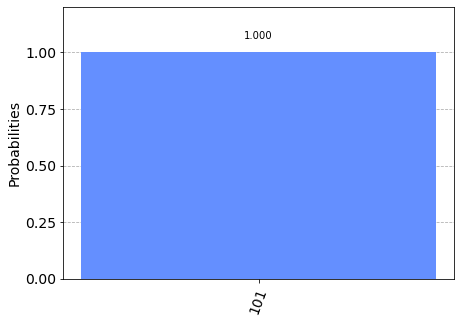

In [9]:
result=execute(twoBitAdd,backend=simulator).result()
plot_histogram(result.get_counts())